In [1]:
import numpy as np

In [2]:
data1 = np.load('./temp_diff_clim_93_20_last.npz')
data1.files

['lat', 'lon', 'depth', 'temp_clim_anom']

In [3]:
temp_clim_anom = data1['temp_clim_anom'][:]
temp_clim_anom.shape

(10227, 55, 41, 41)

In [4]:
temp_clim_anom_surface = temp_clim_anom[:,0,:,:]
temp_clim_anom_surface.shape

(10227, 41, 41)

In [5]:
data2 = np.load('./mld_93_20_south_ocean_climate_resolution.npz')
data2.files

['lat', 'lon', 'mld']

In [6]:
mld = data2['mld'][:]
mld.shape

(10227, 41, 41)

In [13]:
def rotate_90_degrees(matrix):
    n = len(matrix)
    result = [[0] * n for _ in range(n)]
    
    for i in range(n):
        for j in range(n):
            result[n-j-1][i] = matrix[i][j]
    
    return result
list = []
for i in range(10227):
    rotated_matrix = rotate_90_degrees(mld[i])
    list.append(rotated_matrix)
list_array = np.array(list)

In [17]:
mld_last = list_array
ssta_last = temp_clim_anom_surface

In [18]:
mld_last1 = mld_last[0]
ssta_last1 = ssta_last[0]

In [33]:
import numpy as np
from scipy.stats import pearsonr, t
from numpy.linalg import norm

def corr_sig(x, y, alpha=0.05):
    # x and y must have the same length
    if len(x) != len(y):
        raise ValueError('x and y must have the same length')

    # Pearson correlation r
    Sxy = np.cov(x, y)[0, 1]
    r = Sxy / (np.std(x) * np.std(y))

    n = len(x)

    # Effective degree of freedom vt
    r_lagx = np.correlate(x, x, mode='full')[n-1] / (norm(x)**2)
    r_lagy = np.correlate(y, y, mode='full')[n-1] / (norm(y)**2)
    vtx = n * (1 - r_lagx**2) / (1 + r_lagx**2)
    vty = n * (1 - r_lagy**2) / (1 + r_lagy**2)
    vt = (vtx + vty) / 2

    tt = int(vt)

    # Two-tailed T-test
    t_r = np.sqrt(n - 2) * np.abs(r) / np.sqrt(1 - r**2)
    t_ref = t.ppf(1 - alpha/2, tt)

    if t_r > t_ref:
        h = 1
    else:
        h = 0

    return r, h

x = np.random.rand(2)
y = np.random.rand(2)
correlation_coefficient, t_test_result = corr_sig(x, y)
print("Pearson's linear correlation coefficient:", correlation_coefficient)
print("T-test result:", t_test_result)

Pearson's linear correlation coefficient: -2.0
T-test result: 0


C:\Users\mymylove\AppData\Local\Temp/ipykernel_52368/3397492882.py:26: RuntimeWarning: invalid value encountered in sqrt
  t_r = np.sqrt(n - 2) * np.abs(r) / np.sqrt(1 - r**2)


In [27]:
corr

-0.01650612474052664

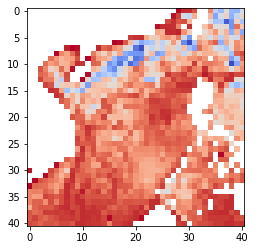

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

data = np.array(list_array[0])
data = np.where(data<-100, np.nan, data)
plt.imshow(data, cmap='coolwarm_r', interpolation='nearest')

plt.show()